In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import shapely.geometry
from metaearth.provider.metloom import *
from metloom.pointdata.snotel_client import SeriesSnotelClient, MetaDataSnotelClient
from metloom.pointdata.snotel import SnotelPointData
from datetime import datetime
import geopandas as gpd
from metloom.pointdata import CDECPointData
from metloom.variables import CdecStationVariables
from omegaconf import OmegaConf
from metaearth.config import ConfigSchema
from metaearth.api import _initialize_providers

/Users/jacobyeung/mambaforge/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
snotel_summary = pd.read_csv('../snotel_data/SNOTEL_summary.csv', delimiter=',', 
encoding_errors="ignore", lineterminator='\n')
snotel_summary.columns = [col.rstrip(' ') for col in snotel_summary.columns]

In [4]:
snotel_summary.columns

Index(['Num', 'SNOTEL ID', 'SNOTEL State', 'SNOTEL Name', 'SNOTEL Elev (ft)',
       'SNOTEL Lat ()', 'SNOTEL Lon ()', 'Data Starting Date',
       'Data Ending Date', 'Unnamed: 9', 'Unnamed: 10', '\r'],
      dtype='object')

In [5]:
snotel_summary.head()

,Num,SNOTEL ID,SNOTEL State,SNOTEL Name,SNOTEL Elev (ft),SNOTEL Lat (),SNOTEL Lon (),Data Starting Date,Data Ending Date,Unnamed: 9,Unnamed: 10,\r
0,1,1000,OR,Annie Springs,6010,42.87,-122.17,9/15/2000,9/30/2018,NaN,NaN,\r
1,2,1001,AK,Long Lake,850,58.19,-133.83,10/1/1999,9/30/2018,NaN,NaN,\r
2,3,1003,AK,Mcneil Canyon,1320,59.74,-151.25,10/1/1986,9/30/2018,NaN,NaN,\r
3,4,1005,CO,Ute Creek,10650,37.61,-105.37,8/15/2000,9/30/2018,NaN,NaN,\r
4,5,1006,NV,Lewis Peak,7400,40.36,-116.86,8/23/2000,9/30/2018,NaN,NaN,\r


In [6]:
def get_triplet(snotel_summary, id):
    curr_snotel = snotel_summary[snotel_summary['SNOTEL ID']==id]
    id = curr_snotel['SNOTEL ID'].values[0]
    state = curr_snotel['SNOTEL State'].values[0]
    triplet = f'{id}:{state}:SNTL'
    return triplet

In [7]:
rawah_triplet = get_triplet(snotel_summary, 1032)

In [8]:
rawah_triplet

'1032:CO:SNTL'

# Area of interest

In [10]:
aoi_file = 'config/aoi/aso-2013-2019-regions.json'
region = gpd.read_file(aoi_file)

In [11]:
region

,geometry
0,"MULTIPOLYGON (((-119.09765 38.00096, -119.0976..."


In [13]:
# snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
# vars = [snotel_point.ALLOWED_VARIABLES.SWE]
# points = SnotelPointData.points_from_geometry(region, vars)
# df = points.to_dataframe()
# print(df)

In [14]:
# vrs = [
#     CdecStationVariables.SWE,
#     CdecStationVariables.SNOWDEPTH
# ]
# points = CDECPointData.points_from_geometry(region, vrs, snow_courses=True)
# df = points.to_dataframe()
# print(df)


In [15]:
# snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
# vars = [snotel_point.ALLOWED_VARIABLES.SWE]
# temp_points = SnotelPointData.points_from_geometry(region, vars)
# temp = temp_points.to_dataframe()
# print(temp)

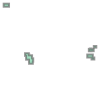

In [12]:
region.unary_union

# SnotelProvider

In [51]:
cfg = OmegaConf.load("config/cdec.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)
pvdrs = _initialize_providers(cfg)

2022-09-10 01:42:46.555 | INFO     | metaearth.api:_initialize_providers:59 - Extraction details for provider ProviderKey.METLOOM with collection CDEC: 
id: CDEC
assets:
- SWE
outdir: data/cdec_land_cover_north_america
datetime: 2017-04-01/2021-04-23
aoi_file: config/aoi/demo_landcover.json
max_items: 1



In [81]:
cfg = OmegaConf.load("config/cdec.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)
pvdrs = _initialize_providers(cfg)
snow = pvdrs[0]
data = snow.extract_assets(dry_run=True)

2022-09-10 02:02:15.460 | INFO     | metaearth.api:_initialize_providers:59 - Extraction details for provider ProviderKey.METLOOM with collection CDEC: 
id: CDEC
assets:
- SWE
outdir: data/cdec_land_cover_north_america
datetime: 2017-04-01/2021-04-23
aoi_file: config/aoi/demo_landcover.json
max_items: 1



In [82]:
snow._locations['CDEC'].to_dataframe()

,name,id,datasource,geometry
0,INDEPENDENCE LAKE (SCS),IDP,CDEC,POINT Z (-120.32200 39.43500 8450.00000)
1,MOUNT ROSE SKI AREA,MSK,CDEC,POINT Z (-119.90200 39.32600 8900.00000)
2,CENT SIERRA SNOW LAB,CSL,CDEC,POINT Z (-120.36700 39.32500 6900.00000)
3,HUYSINK,HYS,CDEC,POINT Z (-120.52963 39.28142 6600.00000)
4,INDEPENDENCE CREEK,INN,CDEC,POINT Z (-120.29300 39.49400 6500.00000)
5,TRUCKEE 2,TK2,CDEC,POINT Z (-120.19400 39.30000 6400.00000)
6,BLUE CANYON,BLC,CDEC,POINT Z (-120.70869 39.28010 5280.00000)
7,INDEPENDENCE CAMP,IDC,CDEC,POINT Z (-120.29855 39.45259 7000.00000)
8,BIG MEADOWS (SCS),BMW,CDEC,POINT Z (-119.94600 39.45800 8700.00000)
9,MEADOW LAKE,MDW,CDEC,POINT Z (-120.50606 39.40566 7200.00000)


In [85]:
snow._assets['CDEC'][0]

,,geometry,SWE,SWE_units,datasource
datetime,site,,,,
2017-04-01 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),77.0,INCHES,CDEC
2017-04-02 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),77.2,INCHES,CDEC
2017-04-03 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),77.2,INCHES,CDEC
2017-04-04 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),76.7,INCHES,CDEC
2017-04-05 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),76.7,INCHES,CDEC
...,...,...,...,...,...
2021-04-19 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),24.7,INCHES,CDEC
2021-04-20 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),24.4,INCHES,CDEC
2021-04-21 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),24.1,INCHES,CDEC


In [79]:
start_date = datetime(2012, 1, 1)
end_date = datetime(2012, 1, 31)
cdec = CdecClient('IDP', 'hi')
met = cdec._get_data(start_date, end_date, [CdecStationVariables.SWE], duration_list=['D'])

In [80]:
met

,,geometry,SWE,SWE_units,datasource
datetime,site,,,,
2012-01-01 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.2,INCHES,CDEC
2012-01-02 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.1,INCHES,CDEC
2012-01-03 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.1,INCHES,CDEC
2012-01-04 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.1,INCHES,CDEC
2012-01-05 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.2,INCHES,CDEC
2012-01-06 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.1,INCHES,CDEC
2012-01-07 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.0,INCHES,CDEC
2012-01-08 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.0,INCHES,CDEC
2012-01-09 08:00:00+00:00,IDP,POINT Z (-120.32200 39.43500 8450.00000),4.1,INCHES,CDEC
